This notebook illustrates a relatively simple approach to spatial anomaly detection. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import multivariate_normal
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

We begin by generating bivarate Gaussian distributions.

In [34]:
mean = np.array([0., 0.])
cov = np.array([[1.0, 0.0], 
                [0.0, 1.0]])

In [35]:
x, y = np.mgrid[-1.5:1.51:.03, -1.5:1.51:.03]
pos = np.dstack((x, y))

labels = ['Baseline', 'Train 1 (NA)', 'Train 2 (NA)', 'Train 3 (NA)', 'Train 4 (A)', 'Train 5 (A)', \
          'Train 6 (A)']

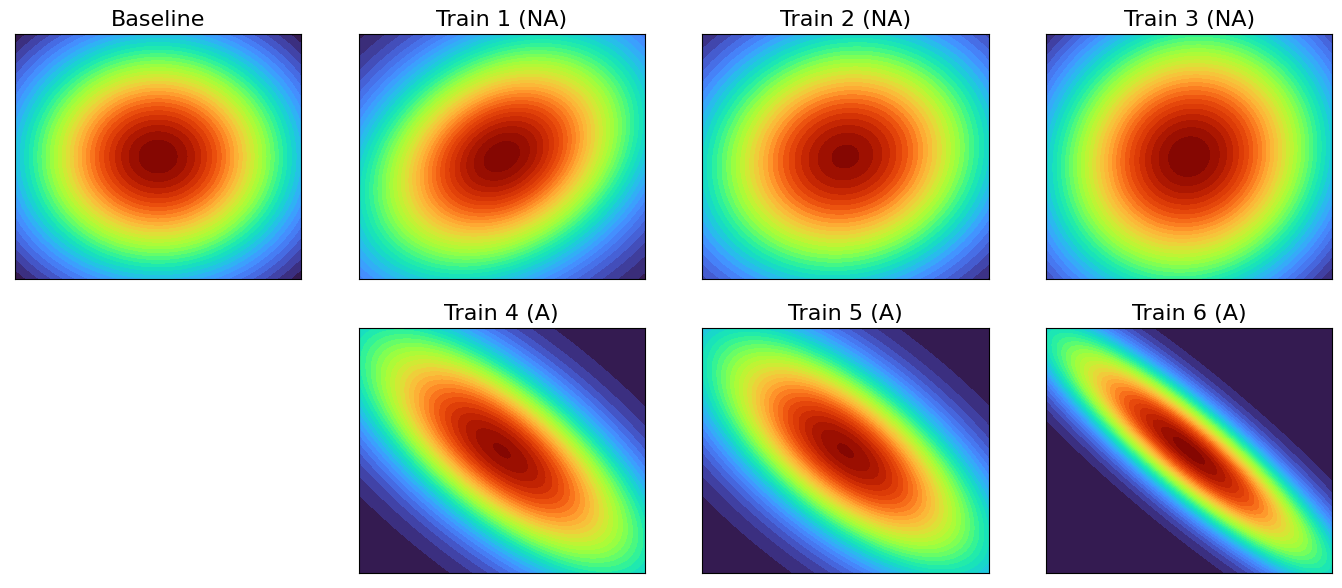

In [38]:
fig = plt.figure(figsize=(17,7))

plt.subplot(241)
rv1 = multivariate_normal(mean, cov)
c = plt.contourf(x, y, rv1.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[0], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
rv2 = multivariate_normal(mean, cov + np.array([[0.0, 0.3], [0.3, 0.0]]) )
c = plt.contourf(x, y, rv2.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[1], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
rv3 = multivariate_normal(mean, cov + np.array([[0.1, 0.1], [0.1, 0.1]]))
c = plt.contourf(x, y, rv3.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[2], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
rv4 = multivariate_normal(mean, cov + np.array([[0.1, 0.4], [0.1, 0.4]]) )
c = plt.contourf(x, y, rv4.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[3], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
rv5 = multivariate_normal(mean, cov + np.array([[0.1, -0.8], [-0.8, 0.1]]))
c = plt.contourf(x, y, rv5.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[4], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
rv6 = multivariate_normal(mean, cov + np.array([[0.0, 0.7], [-0.7, 0.0]]))
c = plt.contourf(x, y, rv6.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[5], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(248)
rv7 = multivariate_normal(mean, cov + np.array([[0.0, 0.3], [-0.9, 0.0]]))
c = plt.contourf(x, y, rv7.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title(labels[6], fontsize=16)
plt.xticks([])
plt.yticks([])

plt.savefig('train.png', dpi=150, bbox_inches='tight')
plt.show()

Our rule is that any distribution with a negative correlation is anomalous. 

In [39]:
def wasserstein_distance(mu_1, cov_1, mu_2, cov_2):
    sqrt_cov_1 = sc.linalg.sqrtm(cov_1)
    K1_K2_K1 = sqrt_cov_1 @ cov_2 @ sqrt_cov_1
    cov_dist = np.abs( np.trace(cov_1) + np.trace(cov_2) - 2 * np.trace(sc.linalg.sqrtm(K1_K2_K1)) )
    l2norm = np.sum(np.square(mu_1 - mu_2))
    d = np.real(np.sqrt(l2norm + cov_dist))
    return d

In [40]:
rv_list = [rv1, rv2, rv3, rv4]
distances_ok = []

for i in range(0, len(rv_list)):
    for j in range(0, len(rv_list)):
        if i > j:
            distances_ok.append(wasserstein_distance(rv_list[i].mean, rv_list[i].cov_object.covariance, \
                                             rv_list[j].mean, rv_list[j].cov_object.covariance))
            
            
rv_list = [rv1, rv2, rv3, rv4, rv5, rv6, rv7]
distances_all = []
combinations = []
for i in range(0, len(rv_list)):
    for j in range(0, len(rv_list)):
        if i > j:
            distances_all.append(wasserstein_distance(rv_list[i].mean, rv_list[i].cov_object.covariance, \
                                             rv_list[j].mean, rv_list[j].cov_object.covariance))
            combinations.append([i,j])
combinations = np.array(combinations)

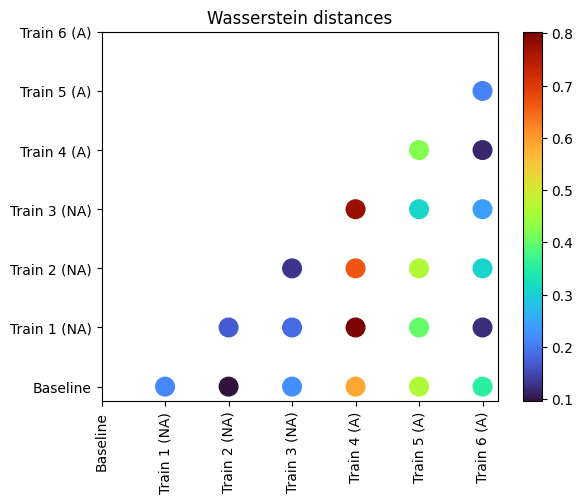

In [22]:
fig, ax = plt.subplots()
c = plt.scatter(combinations[:,0], combinations[:,1], c=distances_all, s=180, cmap=plt.cm.turbo)
plt.colorbar(c)

x = [0, 1, 2, 3, 4, 5, 6]

plt.xticks(x, labels, rotation='vertical')
plt.yticks(x, labels)
plt.title('Wasserstein distances')
plt.savefig('dist.png', dpi=150, bbox_inches='tight')
plt.show()

Based on the above, we set 0.3 as our cut-off. Now let us generate some testing data -- some of which is anomalous and some of which isn't.

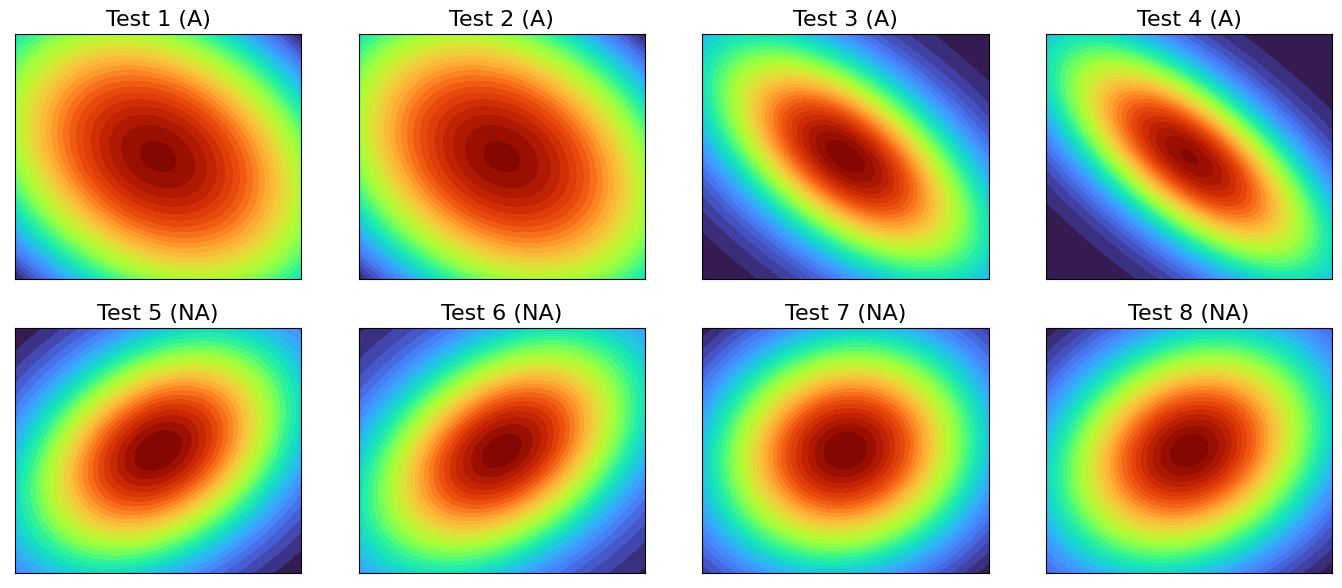

In [41]:
x, y = np.mgrid[-1.5:1.51:.03, -1.5:1.51:.03]
pos = np.dstack((x, y))

new_labels = ['Baseline', 'Test 1 (A)', 'Test 2 (A)', 'Test 3 (A)', 'Test 4 (A)', \
             'Test 5 (NA)', 'Test 6 (NA)', 'Test 7 (NA)', 'Test 8 (NA)']
fig = plt.figure(figsize=(17,7))

plt.subplot(241)
rv8 = multivariate_normal(mean, cov+ np.array([[2.0, -0.85], [-0.85, 2.0]]))
c = plt.contourf(x, y, rv8.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 1 (A)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
rv9 = multivariate_normal(mean, cov + np.array([[2.0, -0.85], [-0.85, 2.0]]) )
c = plt.contourf(x, y, rv9.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 2 (A)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
rv10 = multivariate_normal(mean, cov + np.array([[0.0, -0.6], [-0.6, 0.0]]))
c = plt.contourf(x, y, rv10.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 3 (A)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
rv11 = multivariate_normal(mean, cov + np.array([[0.0, -0.7], [-0.7, 0.0]]) )
c = plt.contourf(x, y, rv11.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 4 (A)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(245)
rv12 = multivariate_normal(mean, cov + np.array([[0.0, 0.35], [0.35, 0.0]]))
c = plt.contourf(x, y, rv12.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 5 (NA)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
rv13 = multivariate_normal(mean, cov + np.array([[0.0, 0.4], [0.4, 0.0]]))
c = plt.contourf(x, y, rv13.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 6 (NA)', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
rv14 = multivariate_normal(mean, cov + np.array([[0.0, 0.1], [0.1, 0.0]]))
c = plt.contourf(x, y, rv14.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 7 (NA)', fontsize=16)
plt.xticks([])
plt.yticks([])


plt.subplot(248)
rv15 = multivariate_normal(mean, cov + np.array([[0.0, 0.22], [0.22, 0.0]]))
c = plt.contourf(x, y, rv15.pdf(pos), 40, cmap=plt.cm.turbo)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('Test 8 (NA)', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.savefig('test.png', dpi=150, bbox_inches='tight')
plt.show()

In [26]:
rv_list = [rv1, rv8, rv9, rv10, rv11, rv12, rv13, rv14, rv15]
distances_all = []
combinations = []
for j in range( 1, len(rv_list)):
        distances_all.append(wasserstein_distance(rv_list[0].mean, rv_list[0].cov_object.covariance, \
                                         rv_list[j].mean, rv_list[j].cov_object.covariance))
        combinations.append([0,j])
combinations = np.array(combinations)

boolean = np.array(distances_all) > 0.3

In [27]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap2 = LinearSegmentedColormap.from_list('gr', ['g', 'w', 'r'], N=256)

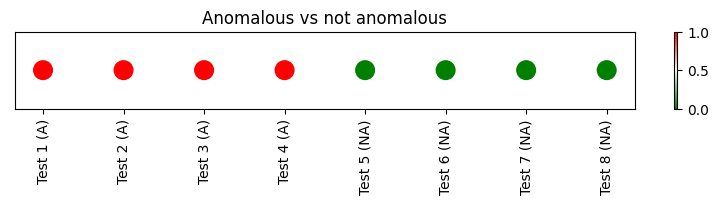

In [31]:
fig, ax = plt.subplots(figsize=(10,1))
c = plt.scatter(combinations[:,1], combinations[:,0], c=boolean, s=180, cmap=cmap2, norm=norm)
plt.colorbar(c)

x = [1, 2, 3, 4, 5, 6, 7, 8]

plt.xticks(x, new_labels[1:], rotation='vertical')
plt.title('Anomalous vs not anomalous')
plt.yticks([])
plt.savefig('result.png', dpi=150, bbox_inches='tight')
plt.show()

In [12]:
cov

array([[1., 0.],
       [0., 1.]])